In [47]:
import pandas as pd
import numpy as np
import os
import  glob
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [48]:
# Ruta de la carpeta donde están los csv
ruta = r"./src/data_sample/ventas"


# Obtener lista de todos los csv
archivos = glob.glob(os.path.join(ruta, "*.csv"))

# Leer y concatenar
dfo = pd.concat(
    [pd.read_csv(archivo) for archivo in archivos],
    ignore_index=True
)

print(dfo.shape)
dfo.head()

dfo.to_csv(r"C:\Users\gabri\OneDrive\Escritorio\ouput_ventas.csv", index=False, sep=";")

(24000, 41)


 ### 1- Mini eda


In [49]:
print("Primeras filas:")
print(dfo[['Superficie', 'Precio']].head())

print("\nEstadísticos:")
print(dfo[['Superficie', 'Precio']].describe())

Primeras filas:
   Superficie  Precio
0         129  530000
1          78  250000
2          78  250000
3          64   58500
4          64   58500

Estadísticos:
          Superficie        Precio
count   24000.000000  2.400000e+04
mean      138.762167  3.435078e+05
std      1787.859671  2.729469e+05
min        14.000000  1.000000e+03
25%        75.000000  1.930000e+05
50%        95.000000  2.750000e+05
75%       120.000000  3.850000e+05
max    175000.000000  5.000000e+06


### 2- Limpieza de datos

In [50]:
# Nos quedamos solo con las columnas necesarias
df = dfo[['Superficie', 'Precio']].copy()

# Eliminar nulos
df = df.dropna()

# Eliminar valores no realistas
df = df[(df['Superficie'] > 10) & (df['Superficie'] < 1000)]
df = df[(df['Precio'] > 10000) & (df['Precio'] < 2000000)]

print("\nShape tras limpieza:", df.shape)



Shape tras limpieza: (23870, 2)


3- Visualización

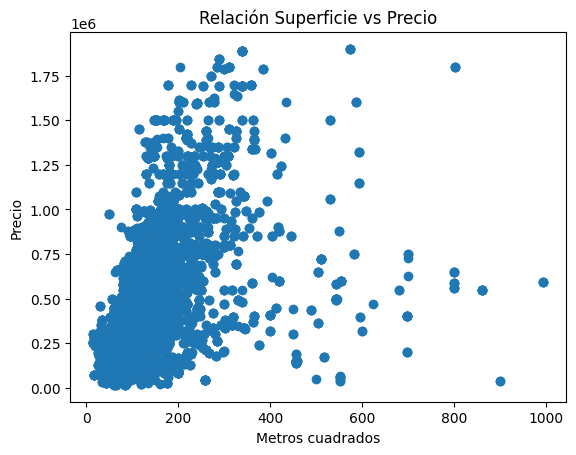

In [51]:
plt.figure()
plt.scatter(df['Superficie'], df['Precio'])
plt.xlabel("Metros cuadrados")
plt.ylabel("Precio")
plt.title("Relación Superficie vs Precio")
plt.show()


### 4- Split de train y de Test

In [52]:
X = df[['Superficie']]
y = df['Precio']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42
)

print("Train:", X_train.shape)
print("Test:", X_test.shape)

Train: (19096, 1)
Test: (4774, 1)


### 5- Modelo de regresion

In [53]:

model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nResultados:")
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R2:", round(r2, 4))



Resultados:
MAE: 123406.83
RMSE: 200984.2
R2: 0.3843


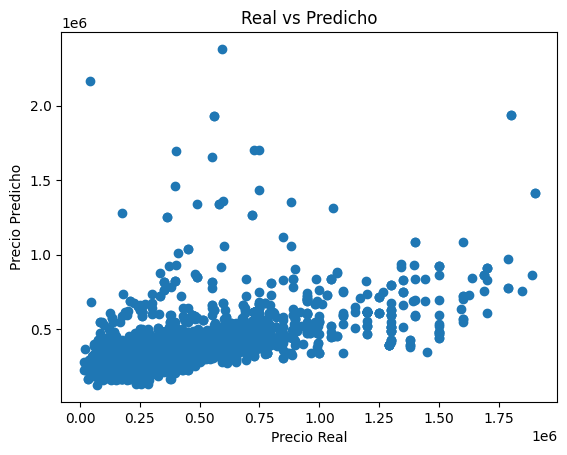

In [54]:

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Real vs Predicho")
plt.show()

In [55]:


print("\nPrecio estimado por m2:", round(model.coef_[0], 2))
print("Intercepto:", round(model.intercept_, 2))





Precio estimado por m2: 2308.83
Intercepto: 86492.58


### 6 Modelo de Predección

In [56]:
### 6 Modelo de Predección


def predecir_precio(metros):
    precio = model.predict([[metros]])
    return round(precio[0], 2)

# Ejemplo:
print("\nPrecio estimado para 100m2:", predecir_precio(100))


Precio estimado para 100m2: 317375.28


c:\Users\gabri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 7. Random forest

In [59]:
# =========================
# 2. CARGA DATASET
# =========================
df_random = dfo.copy()

# =========================
# 3. SELECCIÓN DE FEATURES
# =========================
features = ['Superficie', 'Dormitorios', 'Baños']
target = 'Precio'

df_random = df_random[features + [target]].copy()

# =========================
# 4. LIMPIEZA
# =========================
df_random = df_random.dropna()

# Filtros realistas
df_random = df_random[(df_random['Superficie'] > 20) & (df_random['Superficie'] < 500)]
df_random = df_random[(df_random['Precio'] > 20000) & (df_random['Precio'] < 2000000)]
df_random = df_random[(df_random['Dormitorios'] > 0) & (df_random['Dormitorios'] < 10)]
df_random = df_random[(df_random['Baños'] > 0) & (df_random['Baños'] < 10)]

print("Shape tras limpieza:", df.shape)

# =========================
# 5. SPLIT TRAIN / TEST
# =========================
X = df_random[features]
y = df_random[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# =========================
# 6. MODELO RANDOM FOREST
# =========================
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# =========================
# 7. PREDICCIONES
# =========================
y_pred = rf_model.predict(X_test)

# =========================
# 8. MÉTRICAS
# =========================
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nResultados modelo con 3 features:")
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R2:", round(r2, 4))

# =========================
# 9. IMPORTANCIA DE VARIABLES
# =========================
importances = pd.Series(
    rf_model.feature_importances_,
    index=features
).sort_values(ascending=False)

print("\nImportancia de variables:")
print(importances)

# =========================
# 10. FUNCIÓN DE PREDICCIÓN
# =========================
def predecir_precio(superficie, dormitorios, baños):
    data = [[superficie, dormitorios, baños]]
    pred = rf_model.predict(data)
    return round(pred[0], 2)

# Ejemplo
print("\nEjemplo:")
print("Precio estimado:", predecir_precio(120, 3, 2))

Shape tras limpieza: (23870, 2)

Resultados modelo con 3 features:
MAE: 78225.7
RMSE: 116935.36
R2: 0.7773

Importancia de variables:
Superficie     0.744323
Baños          0.190367
Dormitorios    0.065309
dtype: float64

Ejemplo:
Precio estimado: 396564.44


c:\Users\gabri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [58]:
df_random.columns

Index(['Superficie', 'Dormitorios', 'Baños', 'Precio'], dtype='object')